In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #data visualization library
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  # evaluation metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, log_loss

Read the file containing the data 

In [134]:
data = pd.read_csv("adaptability_level_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


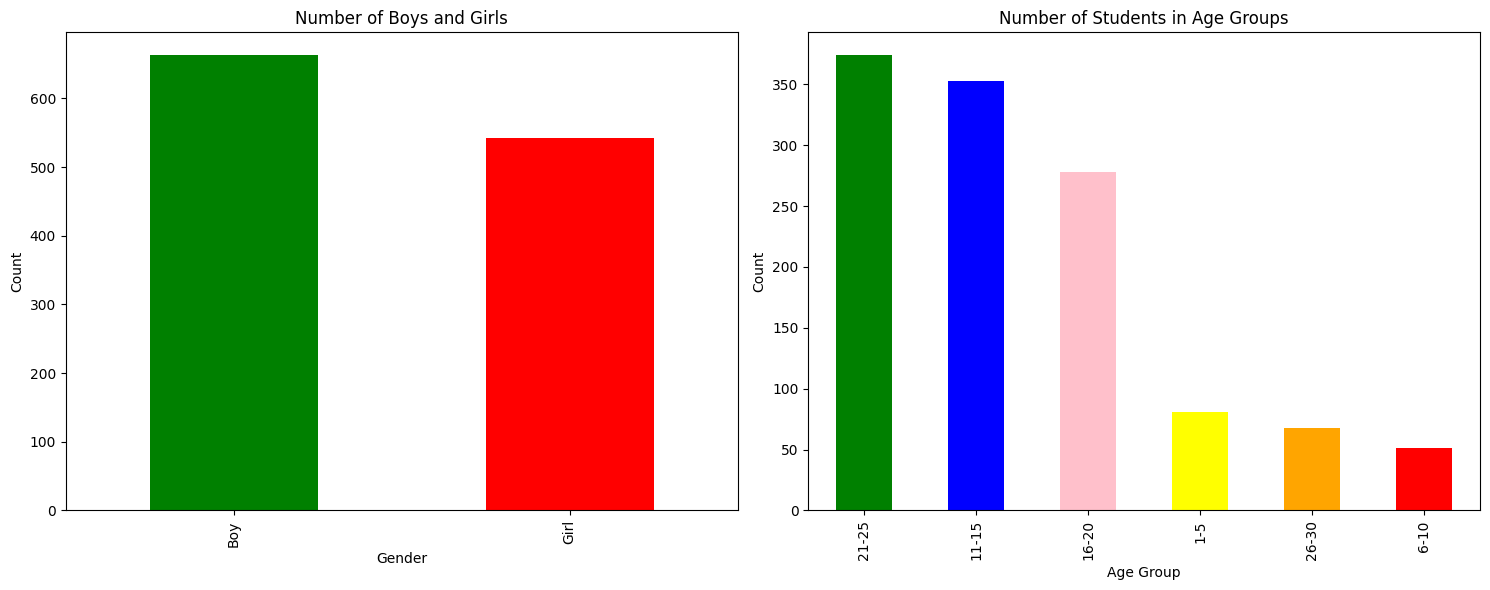

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
data['Gender'].value_counts().plot(kind='bar', color=['green', 'red'], ax=axes[0])
axes[0].set_title('Number of Boys and Girls')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

data['Age'].value_counts().plot(kind='bar', color=['green', 'blue', 'pink', 'yellow', 'orange', 'red'], ax=axes[1])
axes[1].set_title('Number of Students in Age Groups')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.show()

The data contains 1205 lines, with each line representing the information of one student. It includes 13 features (numbered 0-12) and one label, "Adaptivity Level" (number 13). These features are intended to assign the correct label to a student based on their characteristics (features). All data points are non-numerical, which means they need to be converted into numerical form.

First convert data type of each feature to string, so it's easier to process.

In [136]:
for column_name in data.columns:
    data[column_name] = data[column_name].astype(str)
print(data.head)

<bound method NDFrame.head of      Gender    Age Education Level Institution Type IT Student Location  \
0       Boy  21-25      University   Non Government         No      Yes   
1      Girl  21-25      University   Non Government         No      Yes   
2      Girl  16-20         College       Government         No      Yes   
3      Girl  11-15          School   Non Government         No      Yes   
4      Girl  16-20          School   Non Government         No      Yes   
...     ...    ...             ...              ...        ...      ...   
1200   Girl  16-20         College   Non Government         No      Yes   
1201   Girl  16-20         College   Non Government         No       No   
1202    Boy  11-15          School   Non Government         No      Yes   
1203   Girl  16-20         College   Non Government         No       No   
1204   Girl  11-15          School   Non Government         No      Yes   

     Load-shedding Financial Condition Internet Type Network Type  \


Drop students in the age group 1-5, as they are too young to be considered proper students.

In [137]:
data = data[data["Age"] != '1-5']
print(f"Number of data points: {data["Age"].size}.")

Number of data points: 1124.


Identify all possible values for each feature and convert them into numerical format. In this case, the features are all values of the columns except for Adaptivity Level, which is the label.

In [138]:
for column_name in data.columns:
    print(column_name)
    print(data[column_name].unique())
    print()

Gender
['Boy' 'Girl']

Age
['21-25' '16-20' '11-15' '26-30' '6-10']

Education Level
['University' 'College' 'School']

Institution Type
['Non Government' 'Government']

IT Student
['No' 'Yes']

Location
['Yes' 'No']

Load-shedding
['Low' 'High']

Financial Condition
['Mid' 'Poor' 'Rich']

Internet Type
['Wifi' 'Mobile Data']

Network Type
['4G' '3G' '2G']

Class Duration
['3-6' '1-3' '0']

Self Lms
['No' 'Yes']

Device
['Tab' 'Mobile' 'Computer']

Adaptivity Level
['Moderate' 'Low' 'High']



In [139]:
data['Gender'] = data['Gender'].map({'Boy': 0, 'Girl': 1})
data['Age'] = data['Age'].map({'6-10': 0, '11-15': 1, '16-20': 2, '21-25': 3, '26-30': 4})
data['Education Level'] = data['Education Level'].map({'School': 0, 'College': 1, 'University': 2})
data['Institution Type'] = data['Institution Type'].map({'Non Government': 0, 'Government': 1})
data['IT Student'] = data['IT Student'].map({'No': 0, 'Yes': 1})
data['Location'] = data['Location'].map({'No': 0, 'Yes': 1})
data['Load-shedding'] = data['Load-shedding'].map({'Low': 0, 'High': 1})
data['Financial Condition'] = data['Financial Condition'].map({'Poor': 0, 'Mid': 1, 'Rich': 2})
data['Internet Type'] = data['Internet Type'].map({'Wifi': 0, 'Mobile Data': 1})
data['Network Type'] = data['Network Type'].map({'2G': 0, '3G': 1, '4G': 2})
data['Class Duration'] = data['Class Duration'].map({'0': 0, '1-3': 1, '3-6': 2})
data['Self Lms'] = data['Self Lms'].map({'No': 0, 'Yes': 1})
data['Device'] = data['Device'].map({'Mobile': 0, 'Tab': 1, 'Computer': 2})

print(data.head)

<bound method NDFrame.head of       Gender  Age  Education Level  Institution Type  IT Student  Location  \
0          0    3                2                 0           0         1   
1          1    3                2                 0           0         1   
2          1    2                1                 1           0         1   
3          1    1                0                 0           0         1   
4          1    2                0                 0           0         1   
...      ...  ...              ...               ...         ...       ...   
1200       1    2                1                 0           0         1   
1201       1    2                1                 0           0         0   
1202       0    1                0                 0           0         1   
1203       1    2                1                 0           0         0   
1204       1    1                0                 0           0         1   

      Load-shedding  Financial Co

Find all possible label values.

In [140]:
print(data['Adaptivity Level'].unique())

['Moderate' 'Low' 'High']


Create a data frame without labels and scale the feature values using method StandardScaler to make them approximately normally distributed.

In [141]:
X_multi = data.drop(columns=['Adaptivity Level'])
feature_names = X_multi.columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_multi)
scaled_data_frame = pd.DataFrame(scaled_data, columns = feature_names)
scaled_data_frame.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,-0.855509,0.920340,1.107532,-0.708995,-0.608877,0.558168,-0.466656,0.223311,-1.123196,0.763558,1.675460,-0.475117,0.964949
1,1.168895,0.920340,1.107532,-0.708995,-0.608877,0.558168,2.142905,0.223311,0.890317,0.763558,-0.094481,2.104745,-0.443626
2,1.168895,-0.047351,-0.006941,1.410447,-0.608877,0.558168,-0.466656,0.223311,-1.123196,0.763558,-0.094481,-0.475117,-0.443626
3,1.168895,-1.015042,-1.121413,-0.708995,-0.608877,0.558168,-0.466656,0.223311,0.890317,0.763558,-0.094481,-0.475117,-0.443626
4,1.168895,-0.047351,-1.121413,-0.708995,-0.608877,0.558168,-0.466656,-1.800893,0.890317,-1.147888,-1.864421,-0.475117,-0.443626


Divide data into training data (80%), validation data (10%) and test data (10%).

In [142]:
X_train, X_val, y_train, y_val = train_test_split(scaled_data_frame, data['Adaptivity Level'], test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5)

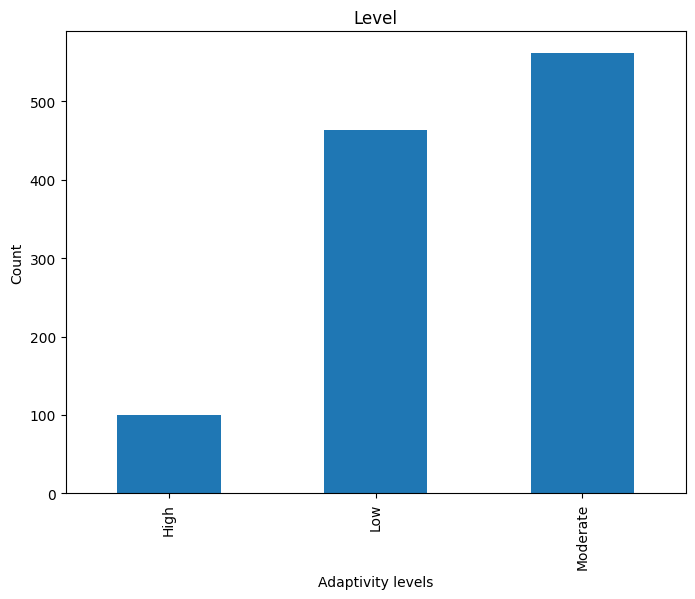

In [145]:
plt.figure(figsize=(8, 6))
data['Adaptivity Level'].value_counts(sort=True).sort_values().plot(kind='bar')

plt.xlabel("Adaptivity levels")
plt.ylabel("Count")
plt.title("Level")
plt.show()